# Project 2
## Admissions Dataset
## Due Date: Lesson 5, September 17, 2016

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
from scipy.stats import stats

%matplotlib inline

### Step 2: Read in your data set 

In [74]:
#Read in data from source 
admin = pd.read_csv("../datasets/admissions.csv")
print admin.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
#Find and store column names, store size of data set
colNames = list(admin.columns.values)
rows = admin.shape[0]
cols = admin.shape[1]

#Print data
print 'Number of rows: ' + str(rows) + '\n'
print 'Number of columns: ' + str(cols) + '\n'
print 'Column names: ' + '[%s]' % ', '.join(map(str,colNames)) + '\n'

print admin.count()
print '\n'

#Check for uniqueness of values in each column
#See if any variables are categorical, continuous/ discrete
for i in range(len(colNames)):
    vals = admin[colNames[i]].unique()
    numNans = admin[colNames[i]].isnull().sum()   
    print colNames[i] + ': ' + str(len(vals)) + ' unique values and ' + str(numNans) + ' NaNs'

Number of rows: 400

Number of columns: 4

Column names: [admit, gre, gpa, prestige]

admit       400
gre         398
gpa         398
prestige    399
dtype: int64


admit: 2 unique values and 0 NaNs
gre: 27 unique values and 2 NaNs
gpa: 133 unique values and 2 NaNs
prestige: 5 unique values and 1 NaNs


Answer: There are 400 total rows with 5 cells of missing data. The total number of entries for each column ranges from 398-399.

#### Question 2. Create a summary table

In [20]:
#Rows containing missing data were removed in order to generate the summary table using the method 'describe'

#Remove rows, store to new variable
admin2 = admin.dropna()

#Check that rows with NaNs were removed
print 'New data frame, rows with NaN removed:'
for i in range(len(colNames)):
   vals = admin2[colNames[i]].unique()
   numNans = admin2[colNames[i]].isnull().sum()
   print colNames[i] + ': ' + str(len(vals)) + ' unique values and ' + str(numNans) + ' NaNs'

#Summary table
print admin2.describe()
print '\n'

#Frequency counts
print 'GRE mode (value, count): ' + str(admin2.gre.value_counts().head(1)) + '\n'
print 'GPA mode (value, count): ' + str(admin2.gpa.value_counts().head(1))

New data frame, rows with NaN removed:
admit: 2 unique values and 0 NaNs
gre: 26 unique values and 0 NaNs
gpa: 131 unique values and 0 NaNs
prestige: 4 unique values and 0 NaNs
            admit         gre         gpa    prestige
count  397.000000  397.000000  397.000000  397.000000
mean     0.317380  587.858942    3.392242    2.488665
std      0.466044  115.717787    0.380208    0.947083
min      0.000000  220.000000    2.260000    1.000000
25%      0.000000  520.000000    3.130000    2.000000
50%      0.000000  580.000000    3.400000    2.000000
75%      1.000000  660.000000    3.670000    3.000000
max      1.000000  800.000000    4.000000    4.000000


GRE mode (value, count): 620.0    30
Name: gre, dtype: int64

GPA mode (value, count): 4.0    28
Name: gpa, dtype: int64


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The standard deviation for GRE is larger because it has a much larger range of values in comparison to 'GPA'.

#### Question 4. Drop data points with missing data


In [ ]:
#See above.

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: See above output.

#### Question 6. Create box plots for GRE and GPA

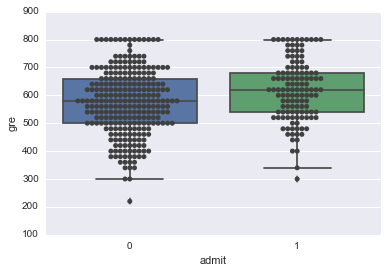

In [6]:
#Boxplot of GRE for the rejected and accepted groups
p1 = sns.boxplot(y='gre',x='admit',data=admin2)
p1 = sns.swarmplot(x='admit', y='gre', data=admin2, color=".25")

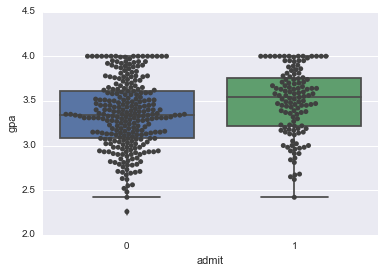

In [7]:
#Boxplot of GPA for the rejected and accepted groups
p2 = sns.boxplot(y='gpa',x='admit',data=admin2)
p2 = sns.swarmplot(x='admit', y='gpa', data=admin2, color=".25")

#### Question 7. What do this plots show?

Answer: I decided to add swarm plots in order to better visualize the distribution of the data. Boxplots in general display the variable's minimum (bottom whisker), maximum (top whisker), first quartile (bottom of the box), second quartile/ median (line within box), and the third quartile (top of the box). The height of the box (Q3-Q1) is the inter quartile range. Outliers are shown as dots.

#### Question 8. Describe each distribution 

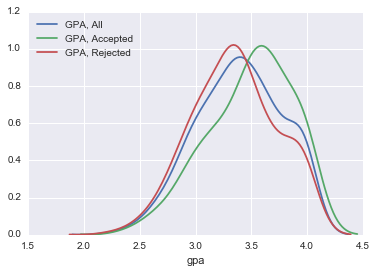

In [8]:
#GPA grouped by 'admit'
sns.distplot(admin2.gpa,hist=False,label='GPA, All')
sns.distplot(admin2.gpa[admin2.admit == 1],hist=False,label='GPA, Accepted')
sns.distplot(admin2.gpa[admin2.admit == 0],hist=False,label='GPA, Rejected')

The distribution of the 'gpa' variable is not normal. As shown in the summary table above, the median is slightly to the right of the mean and the mode is to the right of the median. Because of this, the distribution is mostlikely skewed to the right.

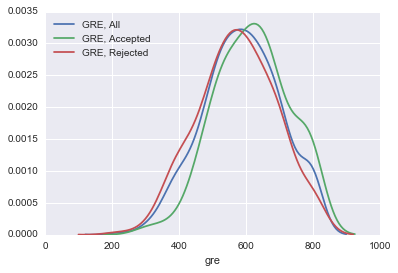

In [9]:
#GRE grouped by 'admit'
sns.distplot(admin2.gre,hist=False,label='GRE, All')
sns.distplot(admin2.gre[admin2.admit == 1],hist=False,label='GRE, Accepted')
sns.distplot(admin2.gre[admin2.admit == 0],hist=False,label='GRE, Rejected')

The distribution of the'gre' variable is also not normal. The median is less than the mean which is less than the mode. Normality is difficult to assess by eye. However, examination of the 'admit' subgroups in 'gre' suggests the data may also be skewed to the right due to the distribution of the accepted subgroup.

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: We would not meet that requirement. Both distributions are skewed towards the right (skewness measure < 0 == right skew, per the documentation, see below).

In [24]:
print 'GPA skewness measure: ' + str(stats.skew(admin2.gpa))
print 'GRE skewness measure: ' + str(stats.skew(admin2.gre)) + '\n'

print 'GPA, rejected skewness measure: ' + str(stats.skew(admin2.gpa[admin2.admit == 0]))
print 'GPA, accepted skewness measure: ' + str(stats.skew(admin2.gpa[admin2.admit == 1]))
print 'GRE, rejected skewness measure: ' + str(stats.skew(admin2.gre[admin2.admit == 0]))
print 'GRE, accepted skewness measure: ' + str(stats.skew(admin2.gre[admin2.admit == 1]))

GPA skewness measure: -0.216068591779
GRE skewness measure: -0.145494593225

GPA, rejected skewness measure: -0.0855833625783
GPA, accepted skewness measure: -0.533121444538
GRE, rejected skewness measure: -0.110273492204
GRE, accepted skewness measure: -0.167981728471


#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: This data set does not need correction unless one would like 'gre' and 'gpa' to be on the same scale. If that is the case, both columns could be normalized so that the range of values are between 0 and 1. There are also very few outliers in this data set. The data can be transformed in order to account for these values and make the distributions more normal in the tranformed space.

#### Question 11. Which of our variables are potentially colinear? 

In [30]:
# create a correlation matrix for the data
print admin2[['gre','gpa']].corr()
print admin2.corr()

          gre       gpa
gre  1.000000  0.382408
gpa  0.382408  1.000000
             admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000


#### Question 12. What did you find?

Answer: 'GRE' and 'GPA' are positivel correlated while prestige and admit are negatively correlated. These values suggests higher GPA's would likely be observed with higher GRE scores, and applicants from more prestigious schools (closer to 1) are more likely to be admited into the program.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Determine the relationship between admittance and the prestige of the undergraduate institution:
1. Count missing values
2. Clean the data set to remove rows with missing values or replace missing values with the mode (since categorical)
3. Create a summary table of the statistics of the variables (count/ frequency especially)
4. Examine the distribution of the variables or the mode of each value via a histogram
5. Find the correlation between the two variables

#### Question 14. What is your hypothesis? 

Answer: Students from more prestigous schools are more likely to be accepted into the graduate program.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data
The missing data can be replaced. In the 'gre' vs. 'gpa' examination, missing data can be replaced by the median, mean, or mode of each variable. For the 'admit' vs. 'prestige' data, substituting the mode of each variable for missing values would be the best alternative since the variables are categorical.

#### 2. Bonus: Log transform the skewed data

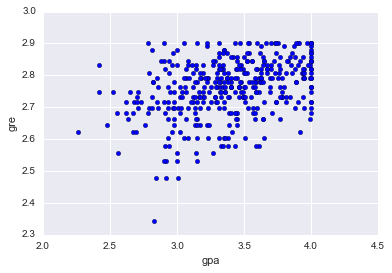

In [41]:
y = np.log10(admin2.gre)
x = admin2.gpa
plt.scatter(x,y)
plt.xlabel('gpa')
plt.ylabel('gre')

#### 3. Advanced: Impute missing data
For 'gpa' and 'gre', missing variables were replaced by the means of each variable (see below):

In [100]:
admin3 = admin[['gre','gpa']]
colMeans = stats.nanmean(admin3)
y = admin3.gre.fillna(colMeans[0])
x = admin3.gpa.fillna(colMeans[1])